# **Model Training and Evaluation for Phishing Website Detection**

## **1. Objective:**
The objective of this project is to train and evaluate various machine learning and deep learning models to detect phishing websites.
Both phishing and legitimate URLs are used to create a feature-rich dataset, and each model’s performance is measured and compared to identify the most effective approach.

## **2. Loading the Data:**
This resulting CSV file *urldata.csv* is uploaded here and loaded into a DataFrame for model training and analysis.

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
df = pd.read_csv('data/6.FinalDataset.csv')
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


## **3. Exploratory Data Analysis (EDA)**
In this step, the dataset is cleaned and transformed using various preprocessing techniques to prepare it for model training.

### **3.1 Inspect the Data**
basic DataFrame methods are used to examine the dataset, understand its structure, and review the extracted features.

In [3]:
#Checking the shape of the dataset
df.shape

(10000, 17)

In [4]:
#Listing the features of the dataset
df.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'label'],
      dtype='object')

In [5]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10000 non-null  int64
 1   Have_At        10000 non-null  int64
 2   URL_Length     10000 non-null  int64
 3   URL_Depth      10000 non-null  int64
 4   Redirection    10000 non-null  int64
 5   https_Domain   10000 non-null  int64
 6   TinyURL        10000 non-null  int64
 7   Prefix/Suffix  10000 non-null  int64
 8   DNS_Record     10000 non-null  int64
 9   Web_Traffic    10000 non-null  int64
 10  Domain_Age     10000 non-null  int64
 11  Domain_End     10000 non-null  int64
 12  iFrame         10000 non-null  int64
 13  Mouse_Over     10000 non-null  int64
 14  Right_Click    10000 non-null  int64
 15  Web_Forwards   10000 non-null  int64
 16  label          10000 non-null  int64
dtypes: int64(17)
memory usage: 1.3 MB


In [6]:
#Statistical Summary of Features
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.000000
mean,0.00350,0.004900,0.167400,0.723500,0.00830,0.000400,0.068900,0.184500,0.037700,0.001000,0.0,0.0,0.122300,0.0,0.005900,0.017200,0.500000
std,0.05906,0.069832,0.373351,1.380666,0.09073,0.019997,0.253297,0.387911,0.190479,0.031609,0.0,0.0,0.327648,0.0,0.076588,0.130023,0.500025
min,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000
75%,0.00000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000
max,1.00000,1.000000,1.000000,16.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000


In [7]:
#checking the data for null or missing values
df.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
label            0
dtype: int64

In [8]:
#check the data types
df.dtypes

Have_IP          int64
Have_At          int64
URL_Length       int64
URL_Depth        int64
Redirection      int64
https_Domain     int64
TinyURL          int64
Prefix/Suffix    int64
DNS_Record       int64
Web_Traffic      int64
Domain_Age       int64
Domain_End       int64
iFrame           int64
Mouse_Over       int64
Right_Click      int64
Web_Forwards     int64
label            int64
dtype: object

### **3.2 Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

#### **3.2.1 Class Distribution Analysis**
Check for class imbalance

label
1    5000
0    5000
Name: count, dtype: int64


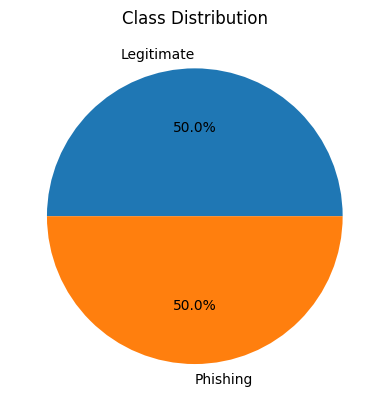

In [11]:
# Count phishing vs legitimate labels
label_counts = df['label'].value_counts()
print(label_counts)
# Pie chart for class distribution
plt.pie(label_counts, labels=['Legitimate', 'Phishing'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


#### **3.2.2 Feature-Wise Distribution Analysis**
Analyze all 16 features individually, Create grouped bar charts for each feature, and Identify discriminative features.

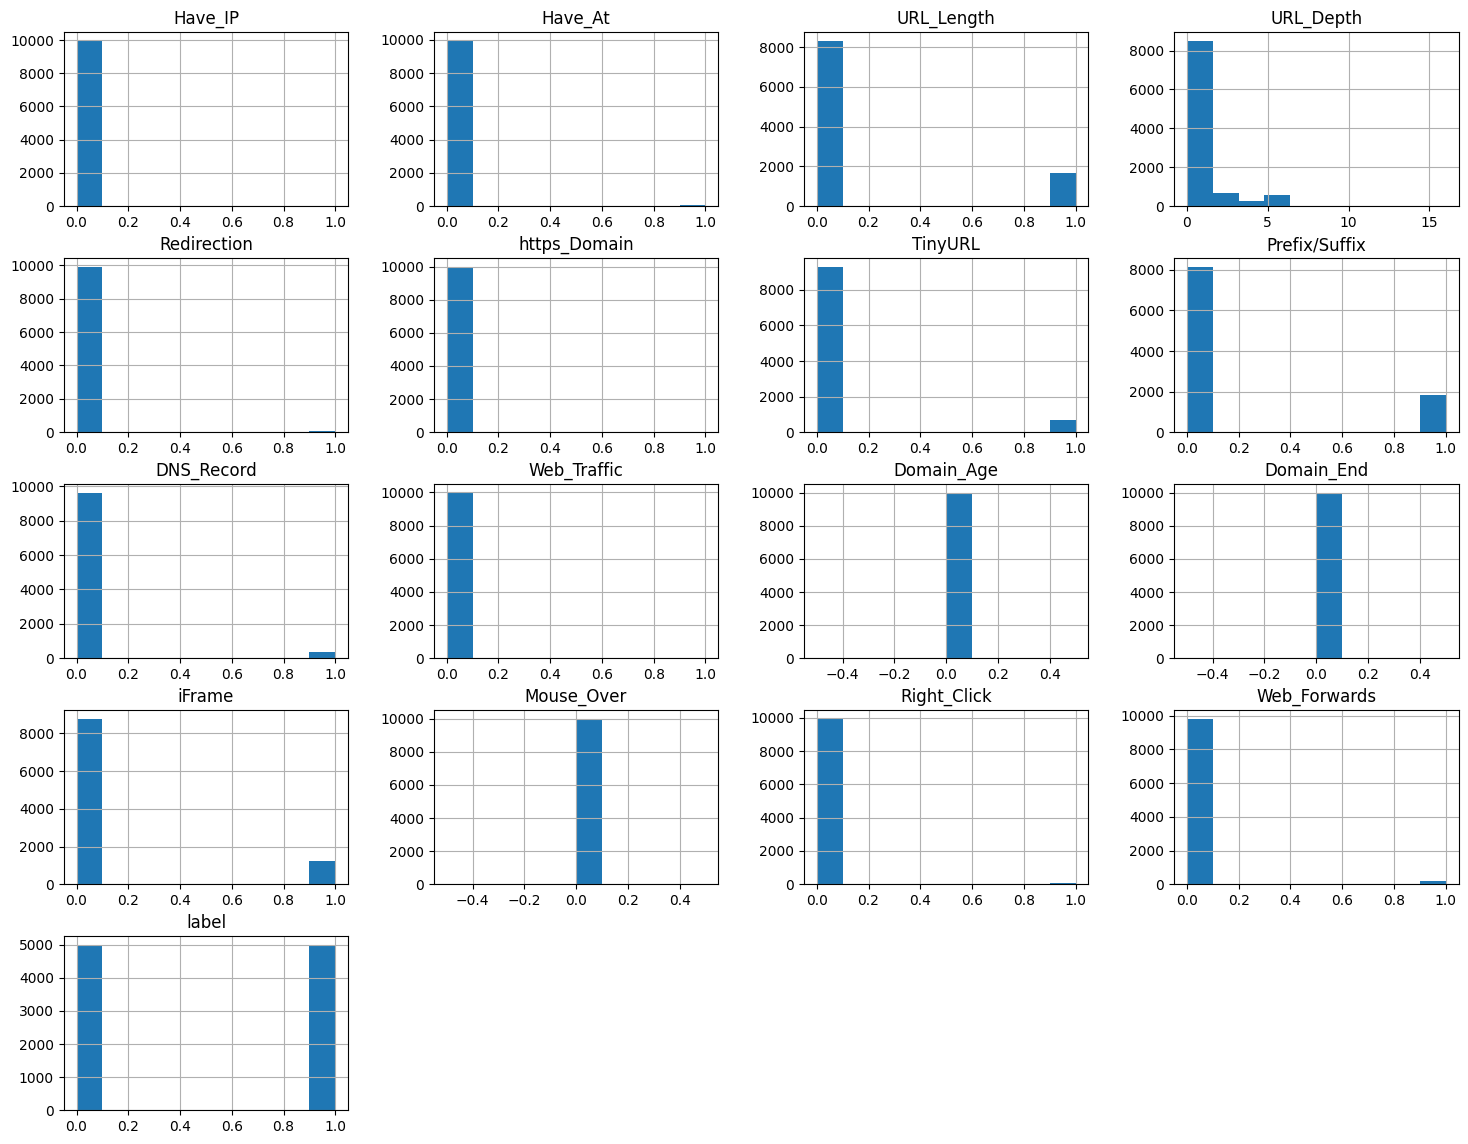

In [ ]:
# Distribution of important features
df.hist(figsize=(18, 14))
plt.show()

#### **3.2.3 Correlation Analysis**
* Create correlation matrix
* Identify highly correlated features (top 5)
* Visualize heatmap and Check for multicollinearity

Top 5 Highly Correlated Feature Pairs:

Feature 1     Feature 2  Correlation
URL_Depth    URL_Length     0.703086
URL_Depth         label     0.524049
    label    URL_Length     0.447858
  Have_IP   Redirection     0.405180
    label Prefix/Suffix     0.228157


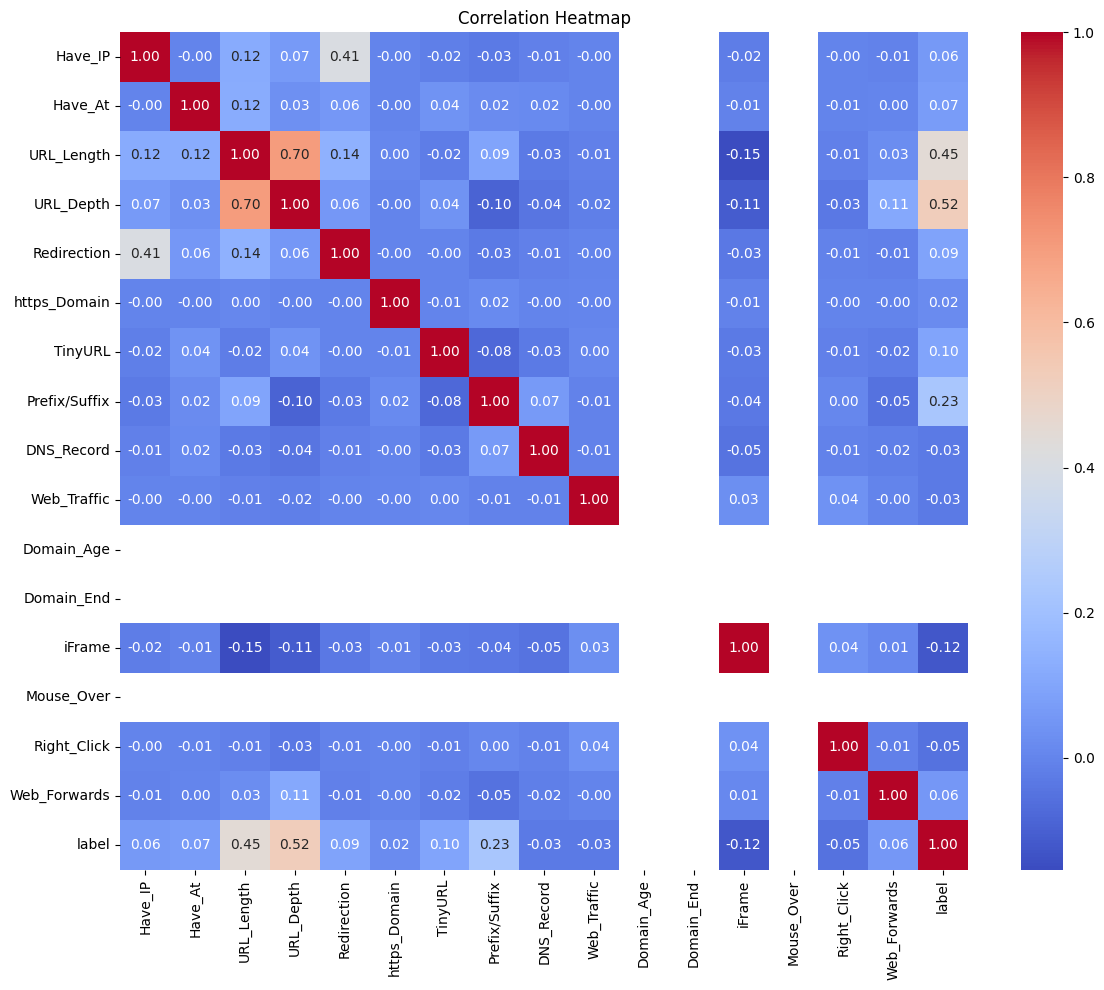

Heatmap saved as 'correlation_heatmap.png'


In [3]:
# Feature Correlation Analysis
corr = df.corr().abs()
top_corr = (corr.where(~np.eye(corr.shape[0],dtype=bool))
                 .unstack()
                 .dropna()
                 .sort_values(ascending=False)
                 .drop_duplicates()
                 .reset_index())
top_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("Top 5 Highly Correlated Feature Pairs:\n")
print(top_corr.head(5).to_string(index=False))

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("Images/correlation_heatmap.png", dpi=300)
plt.show()
print("Heatmap saved as 'correlation_heatmap.png'")


#### **3.2.4 Outlier Detection/Analysis**

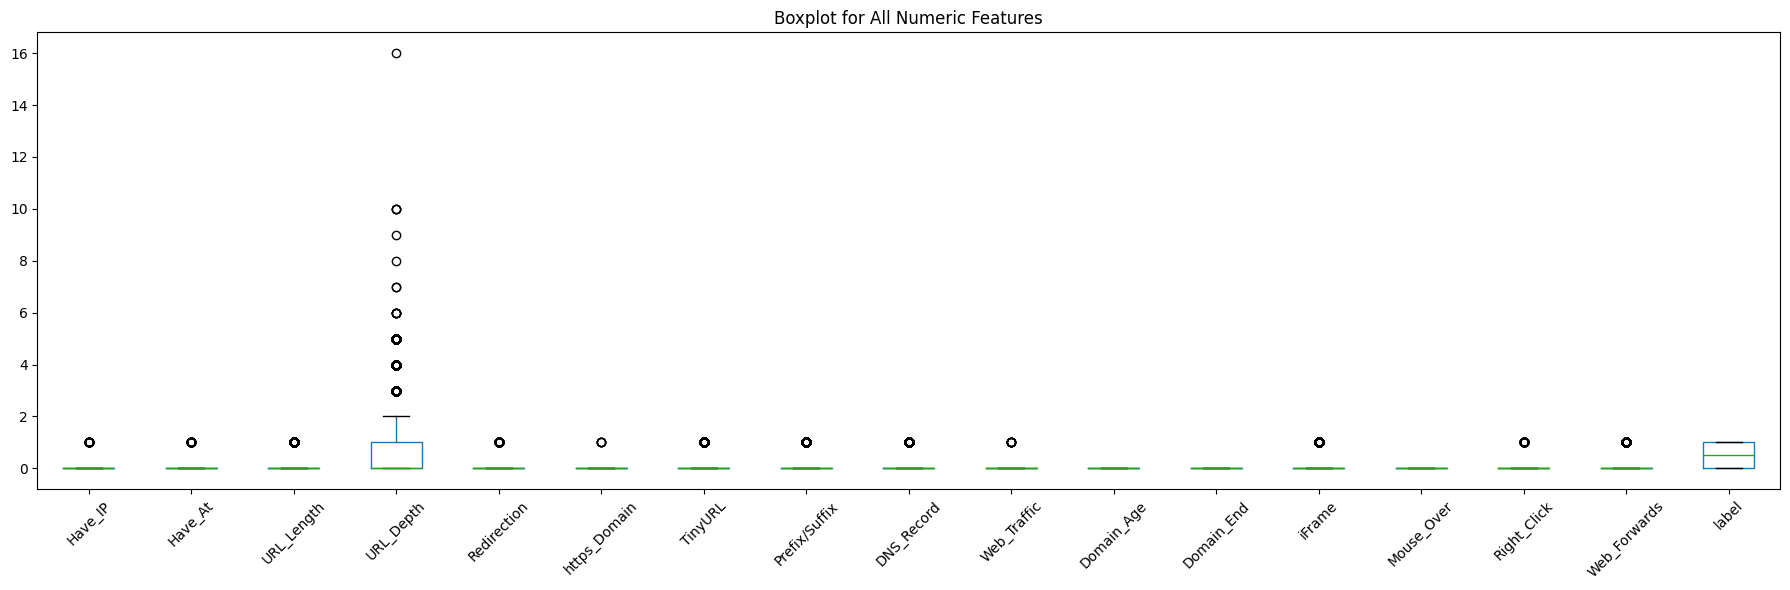

In [4]:
# Boxplot for all numeric featuress
# Select numeric features only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(18, 6))  # Adjust width/height as needed for clarity
df[numeric_cols].boxplot(grid=False)
plt.title('Boxplot for All Numeric Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **3.2.5 Statistical Feature Importance**

          Feature         Chi2         PValue
3       URL_Depth  4943.215780   0.000000e+00
2      URL_Length  2003.369417   0.000000e+00
7   Prefix/Suffix   519.378771  5.776951e-115
12         iFrame   152.051313   6.174633e-35
6         TinyURL    91.288313   1.241919e-21
4     Redirection    81.690076   1.591909e-19
1         Have_At    47.251943   6.242408e-12
0         Have_IP    33.144577   8.555463e-09
15   Web_Forwards    31.524784   1.969108e-08
14    Right_Click    24.619833   6.982934e-07


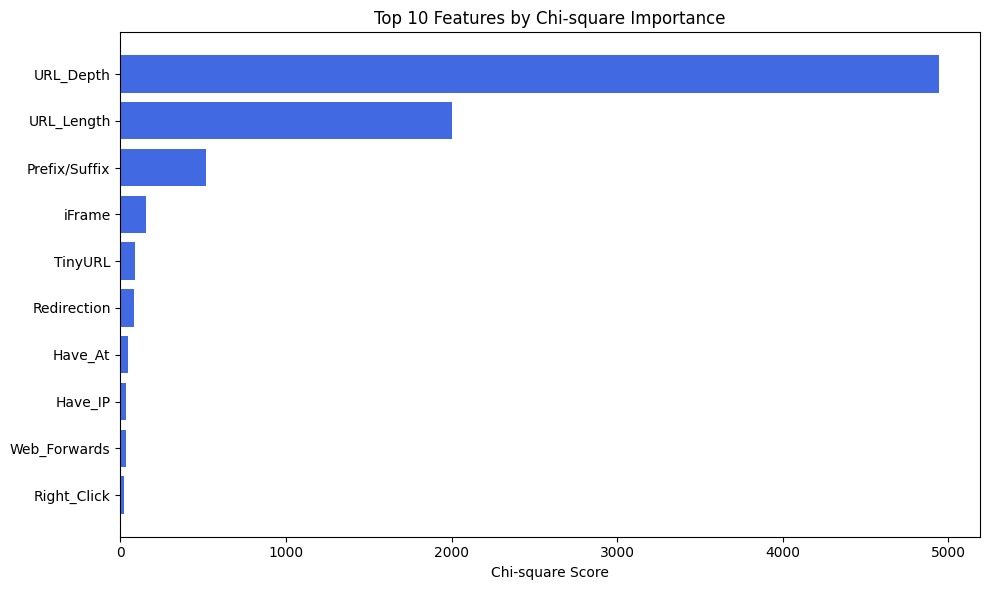

In [17]:
# Chi2 feature importance
from scipy.stats import chi2_contingency
importance = []
for col in df.columns[:-1]:  # Exclude label
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[col], df['label']))
    importance.append((col, chi2, p))
importance_df = pd.DataFrame(importance, columns=['Feature', 'Chi2', 'PValue'])
importance_df_sorted = importance_df.sort_values("Chi2", ascending=False).head(10)
print(importance_df_sorted)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Chi2'], color='royalblue')
plt.xlabel('Chi-square Score')
plt.title('Top 10 Features by Chi-square Importance')
plt.gca().invert_yaxis() # Highest on top
plt.tight_layout()
plt.savefig("Images/feature_importance.png")
plt.show()


## **4. Data Preprocessing**

### **4.1 Shuffling the data**
In the feature extraction file, legitimate and phishing URL features were concatenated without shuffling, placing legitimate data at the top and phishing data at the bottom.
To ensure balanced distribution during train-test splitting and to reduce overfitting, the dataset is shuffled before model training.

In [5]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = df.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, the data is throughly preprocessed & is ready for training.

### **4.3 Splitting the Data**
The dataset is shuffled and divided into training and testing sets to ensure balanced class distribution.
This helps evaluate model performance on unseen data and prevents overfitting.

In [6]:
# Sepratating & assigning features and target columns to X & y
y = data['label']
X = data.drop('label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [7]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [8]:
# Feature Scaling (for SVM, MLP, etc.)
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify feature count
print(f"Scaler fitted on {scaler.n_features_in_} features.")

# Save using joblib (preferred for sklearn)
# joblib.dump(scaler, "scaler.pkl")
# print("Scaler saved successfully as 'scaler.pkl'")



Scaler fitted on 16 features.


## **7. Machine Learning Models and Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
1. XGBoost
2. Random Forest
3. Decision Tree
4. Multilayer Perceptrons
5. Support Vector Machines
6. LightGBM
7. KNN Classifier
8. Gradient Boosting

In [9]:
#importing packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [10]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    # Fit
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Check if predict_proba exists
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_test_proba)
    else:
        roc = None

    # Scores
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    print(f"\n=== {model_name} ===")
    print(f"Accuracy Train: {acc_train:.3f} | Test: {acc_test:.3f}")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    if roc:
        print("ROC AUC Score:", roc)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print("CV Accuracy: {:.3f} +/- {:.3f}".format(cv_scores.mean(), cv_scores.std()))

    # Feature importances for tree models
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feat_names = X_train.columns
        plt.figure(figsize=(9, 6))
        sns.barplot(x=importances, y=feat_names)
        plt.title(f"{model_name} Feature Importances")
        plt.tight_layout()
        plt.show()



### **7.1. XGBoost Classifier**
XGBoost (Extreme Gradient Boosting) is a powerful, widely-used machine learning model that excels in classification and regression tasks. It's an ensemble learning algorithm that combines multiple weak models to create a strong predictive model. Key features include:

- Gradient Boosting: Sequentially adds models to improve predictions
- Regularization: Handles overfitting with L1 and L2 regularization(Regularization techniques (L1 and L2) help prevent overfitting by adding a penalty term to the model's loss function, reducing complexity and improving generalization. Think of it like simplifying a complex equation to make it work better on new data!)
- Scalability: Handles large datasets efficiently

XGBoost is known for its high accuracy, speed, and handling complex data, making it a popular choice for phishing detection tasks.


=== XGBoost ===
Accuracy Train: 0.872 | Test: 0.865
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       986
           1       0.91      0.81      0.86      1014

    accuracy                           0.86      2000
   macro avg       0.87      0.87      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Confusion Matrix:
 [[906  80]
 [190 824]]
ROC AUC Score: 0.907653400066413
CV Accuracy: 0.871 +/- 0.003


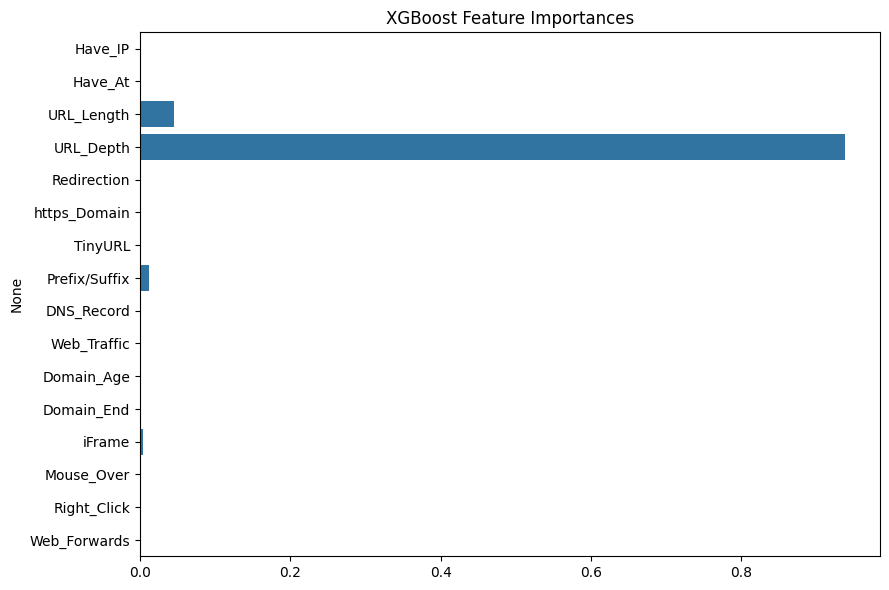

In [11]:
# XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

evaluate_model(xgb, X_train, X_test, y_train, y_test, "XGBoost")

### **7.2. Random Forest Classifier**
Random Forest is an ensemble learning model that combines multiple decision trees to improve prediction accuracy and robustness. It works by:

- Bagging: Creating multiple subsets of data
- Voting: Combining predictions from each tree
- Reducing Overfitting: Averaging results to improve generalization

Great for classification tasks, Random Forest is known for its high accuracy, handling of complex data, and resistance to overfitting.


=== Random Forest ===
Accuracy Train: 0.872 | Test: 0.866
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       986
           1       0.91      0.81      0.86      1014

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
 [[907  79]
 [190 824]]
ROC AUC Score: 0.9077189129069297
CV Accuracy: 0.867 +/- 0.009


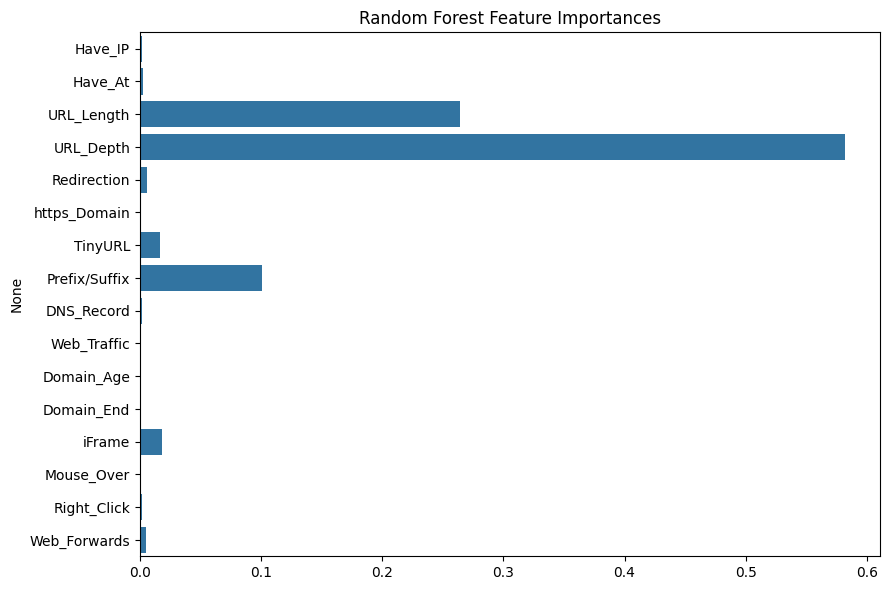

In [12]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

evaluate_model(forest, X_train, X_test, y_train, y_test, "Random Forest")

### **7.3. Decision Tree Classifier**
 A Decision Tree Classifier is a simple, interpretable model that splits data into branches based on feature values, creating a tree-like structure. It's easy to visualize and understand, making it a great starting point for classification tasks. Key characteristics include:
- Easy to interpret: Visualize decision-making process
- Handles categorical data: No need for encoding
- Non-parametric: No assumptions about data distribution


=== Decision Tree ===
Accuracy Train: 0.872 | Test: 0.865
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       986
           1       0.91      0.81      0.86      1014

    accuracy                           0.86      2000
   macro avg       0.87      0.87      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Confusion Matrix:
 [[906  80]
 [190 824]]
ROC AUC Score: 0.9054154614304403
CV Accuracy: 0.871 +/- 0.002


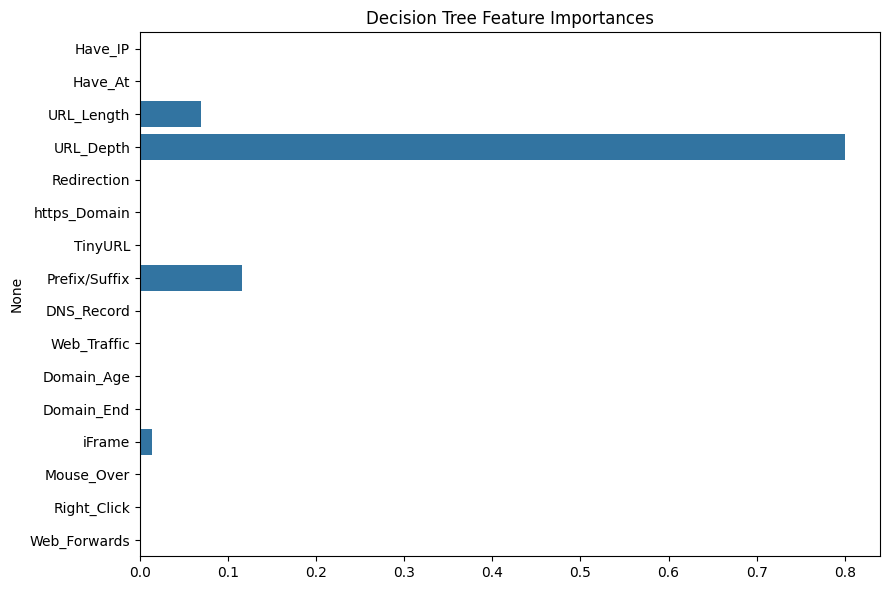

In [13]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

evaluate_model(tree, X_train, X_test, y_train, y_test, "Decision Tree")

### **7.4. Multilayer Perceptrons (MLPs): Deep Learning**
MLPs are a type of neural network with multiple layers of interconnected nodes (neurons). They're great for complex pattern recognition and learning tasks. Key characteristics include:
- Multiple layers: Input, hidden, and output layers
- Non-linear transformations: Learn complex relationships
- Backpropagation: Train using gradient descent

MLPs can learn to recognize patterns in URLs, making them suitable for phishing detection tasks.

In [14]:
# Multilayer Perceptron model
from sklearn.neural_network import MLPClassifier

# Instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100), random_state=42)

# Fit and evaluate using scaled features
evaluate_model(mlp, X_train_scaled, X_test_scaled, y_train, y_test, "MLP Neural Network")


=== MLP Neural Network ===
Accuracy Train: 0.872 | Test: 0.867
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       986
           1       0.91      0.81      0.86      1014

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
 [[907  79]
 [188 826]]
ROC AUC Score: 0.9067407211813516
CV Accuracy: 0.867 +/- 0.007


### **7.5. Support Vector Machines**

SVM (Support Vector Machine) is a powerful classifier that finds the best hyperplane to separate classes. Key characteristics:
- Finds optimal boundary: Maximizes margin between classes
- Handles high-dimensional data: Effective in complex spaces
- Kernel trick: Handles non-linear relationships

Great for classification tasks, SVM is known for its accuracy and robustness, especially with smaller datasets.

In [15]:
# Support Vector Machine (SVM) model
from sklearn.svm import SVC

# Instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test, "SVM")


=== SVM ===
Accuracy Train: 0.869 | Test: 0.862
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       986
           1       0.90      0.82      0.86      1014

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Confusion Matrix:
 [[897  89]
 [187 827]]
CV Accuracy: 0.868 +/- 0.001


### **7.6 LightGBM Classifier**
LightGBM (LGBT) is a fast, efficient gradient boosting model that excels in classification and regression tasks. Key characteristics:
- Gradient Boosting: Sequentially adds models to improve predictions
- Leaf-wise growth: More efficient than level-wise growth
- Faster training: Handles large datasets quickly
- Low memory usage: Optimized for performance

Great for handling complex data, LightGBM is known for its speed and accuracy, making it a popular choice for many tasks.


=== LightGBM ===
Accuracy Train: 0.872 | Test: 0.865
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       986
           1       0.91      0.81      0.86      1014

    accuracy                           0.86      2000
   macro avg       0.87      0.87      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Confusion Matrix:
 [[906  80]
 [190 824]]
ROC AUC Score: 0.9073913487043461
CV Accuracy: 0.871 +/- 0.003


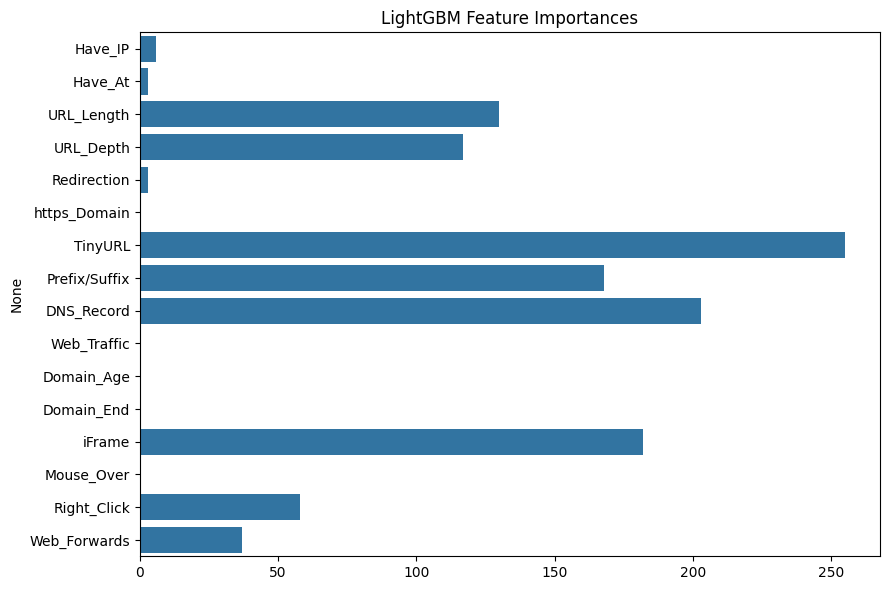

In [16]:
# LightGBM Classifier
from lightgbm import LGBMClassifier


# Define LightGBM model
lgbm = LGBMClassifier(
    objective='binary',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    random_state=42,
    verbose=-1
)


evaluate_model(lgbm, X_train, X_test, y_train, y_test, "LightGBM")

### **7.7 KNN Classifier**

In [17]:
# K-Nearest Neighbors (KNN) model
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN classifier (k=5 by default, you can tune n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit and evaluate using scaled features
evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "K-Nearest Neighbors")


=== K-Nearest Neighbors ===
Accuracy Train: 0.857 | Test: 0.852
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       986
           1       0.99      0.71      0.83      1014

    accuracy                           0.85      2000
   macro avg       0.88      0.85      0.85      2000
weighted avg       0.88      0.85      0.85      2000

Confusion Matrix:
 [[979   7]
 [290 724]]
ROC AUC Score: 0.8758191605554688
CV Accuracy: 0.749 +/- 0.138


#### **7.8 Gradient Boosting Model**


=== Gradient Boosting Classifier ===
Accuracy Train: 0.872 | Test: 0.866
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       986
           1       0.91      0.81      0.86      1014

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
 [[907  79]
 [190 824]]
ROC AUC Score: 0.9082140099459494
CV Accuracy: 0.872 +/- 0.002


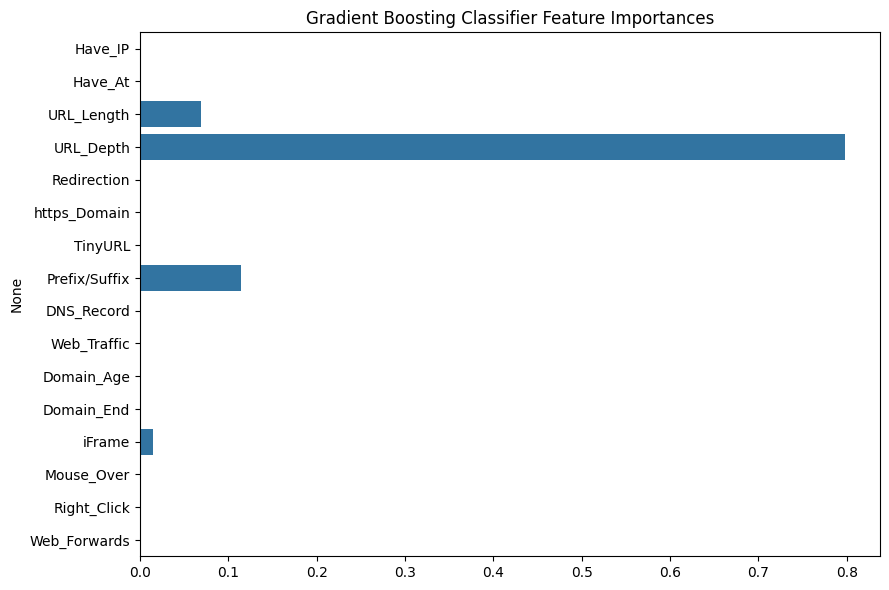

In [18]:
# Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit and evaluate (no scaling needed for tree models)
evaluate_model(gbc, X_train, X_test, y_train, y_test, "Gradient Boosting Classifier")


## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# List your models (tuple: (name, model, use_scaled))
models = [
    ("XGBoost", xgb, False),
    ("Random Forest", forest, False),
    ("Decision Tree", tree, False),
    ("MLP Neural Network", mlp, True),
    ("SVM", svm, True),
    ("LightGBM", lgbm, False),
    ("K-Nearest Neighbors", knn_model, True),
    ("Gradient Boosting", gbc, False),
]

# Prepare results table
results = []

for name, model, use_scaled in models:
    if use_scaled:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append([name, accuracy, f1, precision, recall])

# Display as DataFrame for neat table
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1", "Precision", "Recall"])
print(results_df)


                 Model  Accuracy        F1  Precision    Recall
0              XGBoost    0.8650  0.859228   0.911504  0.812623
1        Random Forest    0.8485  0.824348   1.000000  0.701183
2        Decision Tree    0.8650  0.859228   0.911504  0.812623
3   MLP Neural Network    0.8665  0.860865   0.912707  0.814596
4                  SVM    0.8620  0.856995   0.902838  0.815582
5             LightGBM    0.8650  0.859228   0.911504  0.812623
6  K-Nearest Neighbors    0.8515  0.829799   0.990424  0.714004
7    Gradient Boosting    0.8655  0.859677   0.912514  0.812623


                 Model  Accuracy        F1  Precision    Recall
3   MLP Neural Network    0.8665  0.860865   0.912707  0.814596
7    Gradient Boosting    0.8655  0.859677   0.912514  0.812623
2        Decision Tree    0.8650  0.859228   0.911504  0.812623
0              XGBoost    0.8650  0.859228   0.911504  0.812623
5             LightGBM    0.8650  0.859228   0.911504  0.812623
4                  SVM    0.8620  0.856995   0.902838  0.815582
6  K-Nearest Neighbors    0.8515  0.829799   0.990424  0.714004
1        Random Forest    0.8485  0.824348   1.000000  0.701183


<Axes: xlabel='Model'>

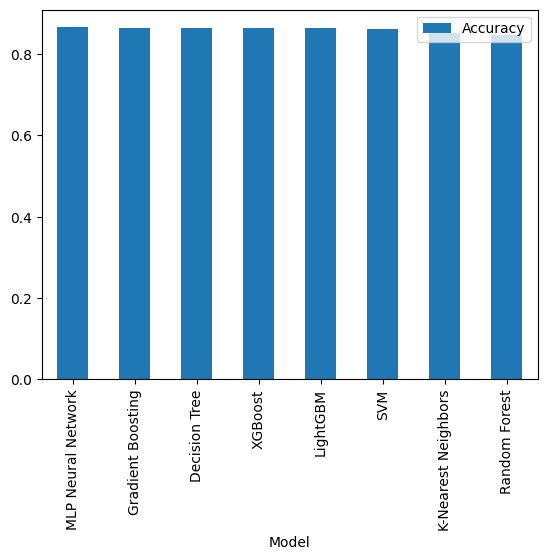

In [20]:
#Sorting the dataframe on accuracy
sorted_df = results_df.sort_values(by="Accuracy", ascending=False)
print(sorted_df)
sorted_df.plot(x="Model", y="Accuracy", kind="bar")

For the above comparision, it is clear that the MLP Classifier works well with this dataset.

In [42]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


**Save the best model**

In [21]:
# Feature names for reference (matches column order)
feature_names = [
    'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection', 'https_Domain',
    'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End',
    'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards'
]
model_data = {
    "model": lgbm,
    "feature_names": feature_names,
    "model_name": "LightGBM"
}
joblib.dump(model_data, "phishing_Model.pkl")


['phishing_Model.pkl']

**Loading the saved model:**

In [22]:
import joblib
lgbm = joblib.load("phishing_Model.pkl")
